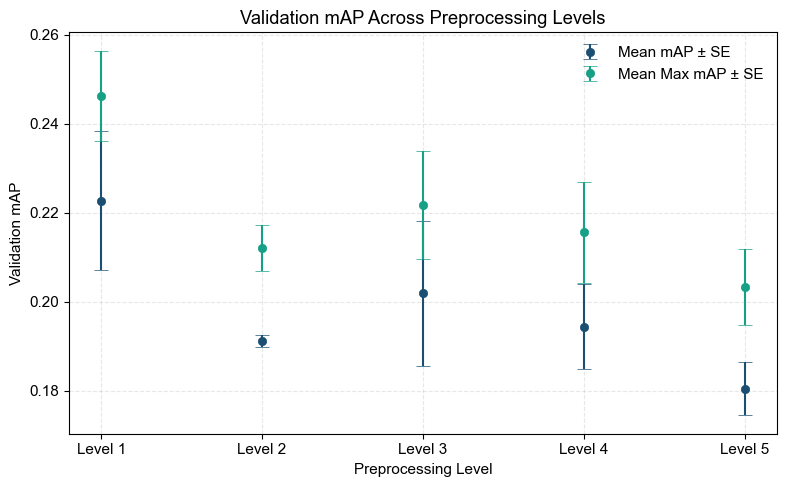

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings for figures (sans-serif preferred for clarity)
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color = '#1B4F72'  # Deep blue
secondary_color = '#16A085'  # Teal
accent_color = '#D35400'  # Burnt orange

# Data
group1 = [0.23934,0.19166,0.23716]
group2 = [0.18937,0.19360,0.19061]
group3 = [0.19220,0.17993,0.23359]
group4 = [0.20789,0.17607,0.19923]
group5 = [0.17016,0.19104,0.18027]

# max
group1_max = [0.26079,0.22687,0.25134]
group2_max = [0.21109,0.20385,0.22151]
group3_max = [0.20069,0.22213,0.24244]
group4_max = [0.22615,0.19285,0.22782]
group5_max = [0.19107,0.21970,0.19917]

data = [group1, group2, group3, group4, group5]
data_max = [group1_max, group2_max, group3_max, group4_max, group5_max]
x = np.arange(1, len(data) + 1)

# Calculate means and SEs
means = [np.mean(g) for g in data]
ses = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data]

means_max = [np.mean(g) for g in data_max]
ses_max = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data_max]

# Create scatter plot with error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x, means, yerr=ses,
    fmt='o',
    color=primary_color,
    ecolor=primary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean mAP ± SE'
)
ax.errorbar(
    x, means_max, yerr=ses_max,
    fmt='o',
    color=secondary_color,
    ecolor=secondary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean Max mAP ± SE'
)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels([f'Level {i}' for i in x])
ax.set_xlabel('Preprocessing Level', color='black')
ax.set_ylabel('Validation mAP', color='black')
ax.set_title('Validation mAP Across Preprocessing Levels', color='black')

# Grid and aesthetics
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')  # All borders black
ax.tick_params(colors='black')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


In [2]:
# t test

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group4, group3, equal_var=False)  # Welch's t-test recommended
print(f"t={t_stat:.4f}, p={p_val:.4f}")


t=-0.3993, p=0.7146


In [3]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(group1, group2, group3, group4, group5)
print(f"ANOVA F={f_stat:.4f}, p={p_val:.4f}")


ANOVA F=1.9586, p=0.1772


None are statistically significant because p>0.05.

Random values

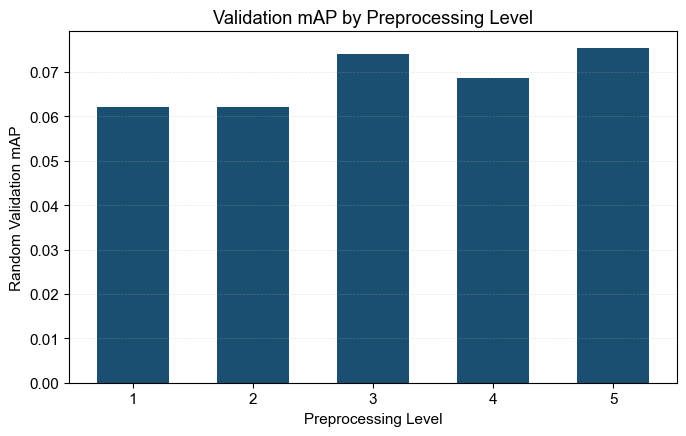

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/Users/amee/Downloads/Raptor preprocessing level results - mAP preprocessing.csv')  # Replace with your filename

# Set plot style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Define color palette
colors = {
    1: '#1B4F72',  # Deep Blue
    2: '#117A65',  # Teal
    3: '#D35400',  # Burnt Orange
    4: '#7D3C98',  # Optional 4th color
    5: '#2E4053'   # Optional 5th color
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

for lvl in range(1, 6):
    # Column names for this level
    mean_col = f'preprocess_lvl: {lvl} - val/mAP'
    min_col = f'preprocess_lvl: {lvl} - val/mAP__MIN'
    max_col = f'preprocess_lvl: {lvl} - val/mAP__MAX'
    rand_col = f'lvl {lvl} random map'
    
    # Extract data
    epochs = df['epoch']
    mean = df[mean_col]
    min_val = df[min_col]
    max_val = df[max_col]
    random = df[rand_col]
    
    # Plot mean line
    ax.plot(epochs, mean, color=colors[lvl], label=f'Level {lvl} val mAP')
    
    # Fill between min/max
    ax.fill_between(epochs, min_val, max_val, color=colors[lvl], alpha=0.2)
    
    # Plot random dotted line
    ax.plot(epochs, random, linestyle=':', color=colors[lvl], label=f'Level {lvl} random mAP')

# Aesthetics
ax.set_xlabel('Epoch', color='black')
ax.set_ylabel('mAP', color='black')
ax.set_title('Validation mAP Over Epochs (With Random Baselines)', color='black')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='black')
ax.spines[:].set_color('black')
ax.legend(frameon=False, fontsize=9, loc='best')

plt.tight_layout()
plt.show()
